# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources in the README.md file
- Happy learning!

In [1]:
# Import your libraries:
import numpy as np
import scipy 
import pandas as pd
from sklearn import datasets


# Challenge 1 - Explore the Scikit-Learn Datasets

Before starting to work on our own datasets, let's first explore the datasets that are included in this Python library. These datasets have been cleaned and formatted for use in ML algorithms.

First, we will load the diabetes dataset. Do this in the cell below by importing the datasets and then loading the dataset  to the `diabetes` variable using the `load_diabetes()` function.

In [2]:
# Your code here:
diabetesDataset = datasets.load_diabetes()
diabetesDataset


{'data': array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
          0.01990842, -0.01764613],
        [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
         -0.06832974, -0.09220405],
        [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
          0.00286377, -0.02593034],
        ...,
        [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
         -0.04687948,  0.01549073],
        [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
          0.04452837, -0.02593034],
        [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
         -0.00421986,  0.00306441]]),
 'target': array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
         69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
         68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
         87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
        259.,  53., 190., 142.,  75., 142., 155., 225.,  59

Let's explore this variable by looking at the different attributes. Do this by looking at the `keys()` of this variable.

In [3]:
# Your code here:
diabetesDataset.keys()


dict_keys(['data', 'target', 'DESCR', 'feature_names', 'data_filename', 'target_filename'])

The next step is to read the description of the dataset. Print the description in the cell below using the `DESCR` attribute of the `diabetes` variable

In [4]:
# Your code here:
diabetesDataset.DESCR

'.. _diabetes_dataset:\n\nDiabetes dataset\n----------------\n\nTen baseline variables, age, sex, body mass index, average blood\npressure, and six blood serum measurements were obtained for each of n =\n442 diabetes patients, as well as the response of interest, a\nquantitative measure of disease progression one year after baseline.\n\n**Data Set Characteristics:**\n\n  :Number of Instances: 442\n\n  :Number of Attributes: First 10 columns are numeric predictive values\n\n  :Target: Column 11 is a quantitative measure of disease progression one year after baseline\n\n  :Attribute Information:\n      - Age\n      - Sex\n      - Body mass index\n      - Average blood pressure\n      - S1\n      - S2\n      - S3\n      - S4\n      - S5\n      - S6\n\nNote: Each of these 10 feature variables have been mean centered and scaled by the standard deviation times `n_samples` (i.e. the sum of squares of each column totals 1).\n\nSource URL:\nhttps://www4.stat.ncsu.edu/~boos/var.select/diabetes.h

What are the variables in this dataset according to the description? List them in the markdown cell below

#### Enter your answer here:




In [5]:
#AGE,SEX, BODY MASS INDEX, AVERAGE BLOOD/NPRESSURE SIX BLOOD

Now explore the data. Scikit-learn typically takes in 2D numpy arrays as input (though pandas dataframes are also accepted). In the cell below find the shape of the numpy array contained in the data portion of the diabetes variable.

In [6]:
# Your code here:
diabetesDataset.data.shape

(442, 10)

# Challenge 2 - Perform Supervised Learning on the Dataset

#### The data has already been split to predictor and response variables. The response variable is in the `target` portion of the variable. 

Given this information, let's apply what we have previously learned about linear regression and apply the algorithm to the diabetes dataset. In the cell below, import the linear regression class from sklearn. 

In [8]:
# Your code here:
import pandas as pd
from sklearn import linear_model


Initialize the model in the variable `diabetes_model`

In [9]:
# Your code here:
diabetes_model = linear_model.LinearRegression()
#create the model



In the cell below, fit the model and print the intercept and coefficients of the model. 

In [10]:
# Your code here:
diabetes_x=diabetesDataset.data
diabetes_y=diabetesDataset.target
diabetes_model.fit(diabetes_x, diabetes_y)
#now we print the model coefficients
print('Ordenada al origen',diabetes_model.intercept_)
print('Coeficientes betas',diabetes_model.coef_)
print('Error del modelo',diabetes_model.score(diabetes_x, diabetes_y))


Ordenada al origen 152.1334841628965
Coeficientes betas [ -10.01219782 -239.81908937  519.83978679  324.39042769 -792.18416163
  476.74583782  101.04457032  177.06417623  751.27932109   67.62538639]
Error del modelo 0.5177494254132934


# Bonus Challenge 1 - Conduct a Hypothesis Test on the Model

Once we have generated a linear model, we can test each coefficient using a t-test to see whether the confidence interval for the variable contains zero. We can also perform an overall F test to check whether at least one coefficient is significantly different from zero. 

Refer to the resource in this [link](https://onlinecourses.science.psu.edu/stat501/node/297/) for more details and perform the t-tests for the model above. Additionally, interpret the results and list coefficients are significantly different from zero.


Hint: use the statsmodels package.

Your result should look similar to this:

![ols](../ols-results.png)

In [17]:
# Your code here:
import statsmodels.api as sm

model = sm.OLS(diabetes_y, diabetes_x).fit()
predictions = model.predict(diabetes_x) 

print_model = model.summary()
print(print_model)

#Observamos un R cuadrada muy bajor por lo que debemos ver que está pasando en el modelo, inclusive la ajustada es mala
# de hecho podemo observar un numero de residual muy grande, y por eso nuestro estadístico F de 5.0, lo que quiere decir que el e
#la razón entre error cuadrado promedio y del modelo es muy desproporcionada. 


OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.106
Model:                            OLS   Adj. R-squared (uncentered):              0.085
Method:                 Least Squares   F-statistic:                              5.100
Date:                Tue, 18 Feb 2020   Prob (F-statistic):                    4.72e-07
Time:                        16:42:58   Log-Likelihood:                         -2873.9
No. Observations:                 442   AIC:                                      5768.
Df Residuals:                     432   BIC:                                      5809.
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------

# Challenge 2 - Peform Supervised Learning on a Pandas Dataframe

Now that we have looked at data that has been formatted for scikit-learn, let's look at data that we will need to format ourselves.

In the next cell, load the `auto-mpg.csv` file included in this folder and assign it to a variable called `auto`.

In [18]:
# Your code here:
auto = pd.read_csv('../auto-mpg.csv')

Look at the first 5 rows using the `head()` function:

In [19]:
# Your code here:
auto.head()

,mpg,cylinders,displacement,horse_power,weight,acceleration,model_year,car_name
0,18.0,8,307.0,130.0,3504,12.0,70,"\t""chevrolet chevelle malibu"""
1,15.0,8,350.0,165.0,3693,11.5,70,"\t""buick skylark 320"""
2,18.0,8,318.0,150.0,3436,11.0,70,"\t""plymouth satellite"""
3,16.0,8,304.0,150.0,3433,12.0,70,"\t""amc rebel sst"""
4,17.0,8,302.0,140.0,3449,10.5,70,"\t""ford torino"""


Evaluate the data to ensure that all numeric columns are correctly detected as such by pandas. If a column is misclassified as object, coerce it to numeric.

In [20]:
# Your code here:
auto.dtypes

mpg             float64
cylinders         int64
displacement    float64
horse_power     float64
weight            int64
acceleration    float64
model_year        int64
car_name         object
dtype: object

What is the newest model year and the oldest model year?

In [21]:
# Your code here:
print(auto.nlargest(1,'model_year'))
print(auto.nsmallest(1,'model_year'))

mpg  cylinders  displacement  horse_power  weight  acceleration  \
367  28.0          4         112.0         88.0    2605          19.6   

     model_year                car_name  
367          82  \t"chevrolet cavalier"  
    mpg  cylinders  displacement  horse_power  weight  acceleration  \
0  18.0          8         307.0        130.0    3504          12.0   

   model_year                       car_name  
0          70  \t"chevrolet chevelle malibu"  


Check the dataset for missing values and remove all rows containing at least one missing value.

In [22]:
# Your code here:
auto.drop(auto[auto.horse_power.isnull()].index, inplace = True)
auto.isnull().sum()

mpg             0
cylinders       0
displacement    0
horse_power     0
weight          0
acceleration    0
model_year      0
car_name        0
dtype: int64

Find the frequency table for the `cylinders` column using the `value_counts()` function. How many possible values of cylinders are there?

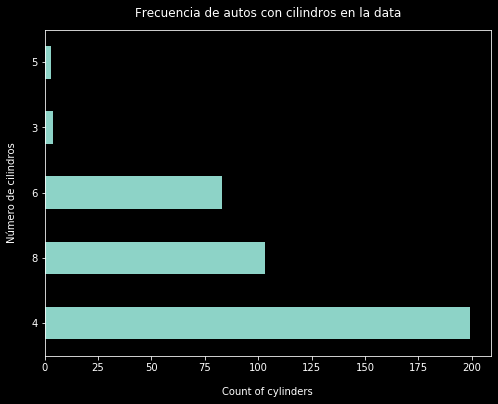

In [25]:
# Your code here:
import seaborn as sns 
import matplotlib.pyplot as plt 
auto.cylinders.value_counts()

auto['cylinders'].value_counts().plot(kind='barh', figsize=(8, 6))
plt.xlabel("Count of cylinders", labelpad=14)
plt.ylabel("Número de cilindros", labelpad=14)
plt.title("Frecuencia de autos con cilindros en la data", y=1.02);


We would like to generate a linear regression model that will predict mpg. To do this, first drop the `car_name` column since it does not contain any quantitative data. Next separate the dataframe to predictor and response variables. Separate those into test and training data with 80% of the data in the training set and the remainder in the test set. 

Assign the predictor and response training data to `X_train` and `y_train` respectively. Similarly, assign the predictor and response test data to `X_test` and `y_test`.

In [58]:
# Import the necessary function
y_auto=auto['mpg'].values.reshape(-1,1)
x_auto=auto.drop(columns=['car_name','mpg'])
x_auto=x_auto


In [59]:
# Your code here:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_auto, y_auto, 
                                                    test_size=0.20)

Now we will the dataset that we processed and peform linear regression on this data to predict the mpg for each vehicle. Initialize the model in the cell below.

In [60]:
# Your code here:
mpg_model = linear_model.LinearRegression()


Next, fit the model in the cell below.

In [61]:
# Your code here:
mpg_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

# Challenge 3 - Evaluate the Model

the r squared score of a model tells us how much variation is explained by the model. In a typical dataset, most observations differ from the mean. When we create a model, we are trying to generate an equation that will tell us by how much each observation will differ from the mean. Obviously, the vast majority of models are not perfect. They can only predict some of the variation from the mean but not all of it. We attribute the rest of the difference between the actual value and the mean to random error. We would like random error to explain the as little as possible of the variation. This is why the r squared score is an important metric.

In the next cell, compute the r squared score of the model. Do this by first computing the predicted values and assign them to `y_pred`.

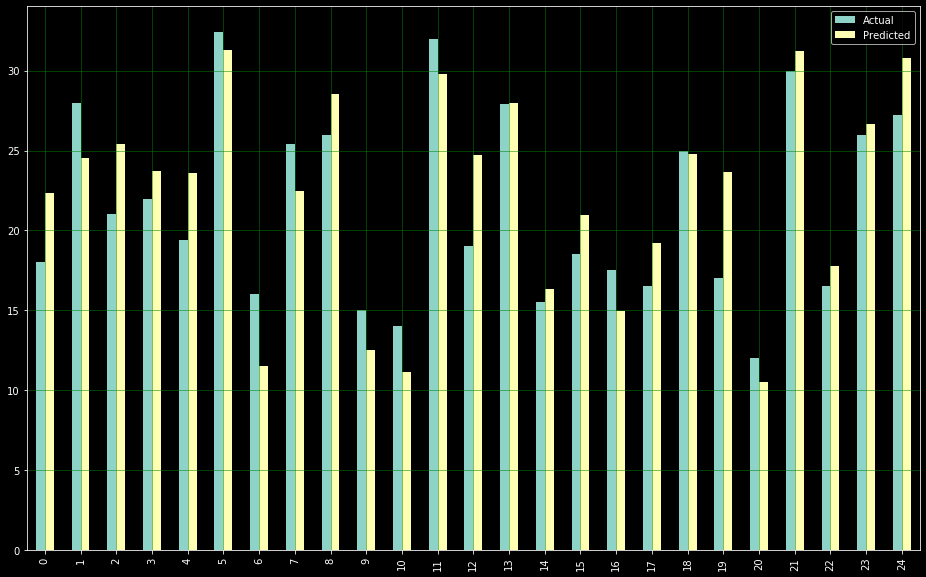

In [67]:
# Import the necessary function:
y_pred=mpg_model.predict(X_test)

diferrences = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
diferrences

diferrences = diferrences.head(25)
diferrences.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()


In [69]:
# Your code here:



#### Our next step is to evaluate the model using the test data. We would like to ensure that our model is not overfitting the data. This means that our model will not be able to generalize well outside of the training data.

In the cell below, use the model to generate the predicted values for the training data and assign them to `y_test_pred`. Compute the r squared score for the test data by comparing the oberserved `y_test` data and the predicted `y_test_pred`.

In [72]:
# Your code here:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))


Mean Absolute Error: 2.4017930219549304
Mean Squared Error: 10.007476694609549
Root Mean Squared Error: 3.163459608499775


# Challenge 4 - Improve the Model Fit

While the most common way to improve the fit of a model is by using regularization, there are other simpler ways to improve model fit. The first is to create a simpler model. The second is to increase the train sample size.

Let us start with the easier option and increase our train sample size to 90% of the data. Create a new test train split and name the new predictors and response variables `X_train09`, `X_test09`, `y_train09`, `y_test09`.

In [73]:
# Your code here:
X_train09, X_test09, y_train09, y_test09 = train_test_split(x_auto, y_auto, 
                                                    test_size=0.20)


Initialize a new model. Name this model `auto_model09`. Fit the model to the new sample data.

In [74]:
# Your code here:

auto_model09 = linear_model.LinearRegression()

Compute the predicted values and r squared score for our new model and new sample data.

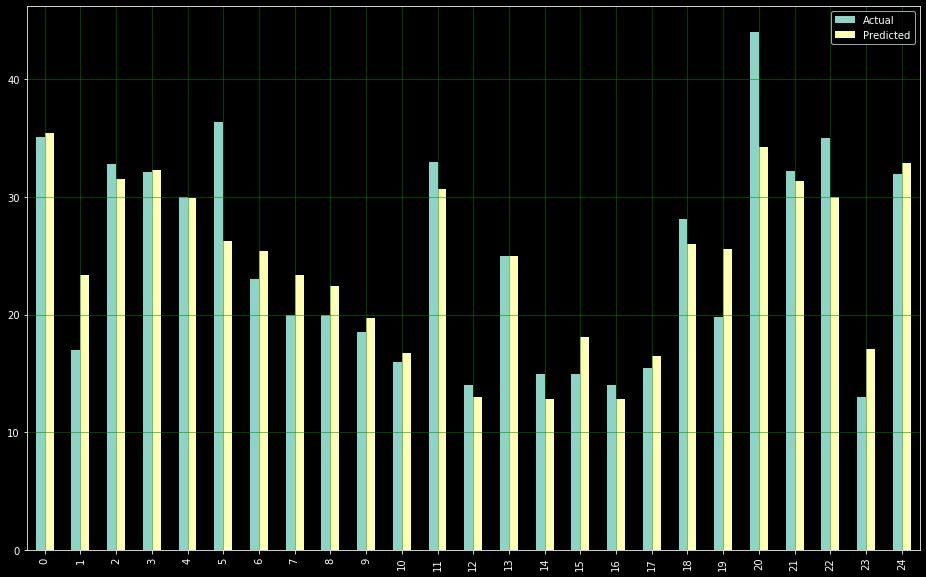

In [76]:
# Your code here:
auto_model09.fit(X_train09, y_train09)
y_pred09=auto_model09.predict(X_test09)

diferrences = pd.DataFrame({'Actual': y_test09.flatten(), 'Predicted': y_pred09.flatten()})

diferrences = diferrences.head(25)
diferrences.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()



Compute the r squared score for the smaller test set. Is there an improvement in the test r squared?

In [78]:
# Your code here:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test09, y_pred09))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test09, y_pred09))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test09, y_pred09)))


Mean Absolute Error: 2.6870342962772713
Mean Squared Error: 11.891553327268438
Root Mean Squared Error: 3.4484131607550217


# Bonus Challenge 2 - Backward Elimination 

The main way to produce a simpler linear regression model is to reduce the number of variables used in the model. In scikit-learn, we can do this by using recursive feature elimination. You can read more about RFE [here](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFE.html).

In the next cell, we will import RFE

In [82]:
from sklearn.feature_selection import RFE
from sklearn.svm import SVR            

Follow the documentation and initialize an RFE model using the `auto_model` linear regression model. Set `n_features_to_select=3`

In [102]:
# Your code here:
selector=RFE(mpg_model,3)



Fit the model and print the ranking

In [103]:
# Your code here:
selector.fit(x_auto,y_auto)
selector.ranking_


array([1, 2, 4, 3, 1, 1])

Feature importance is ranked from most important (1) to least important (4). Generate a model with the three most important features. The features correspond to variable names. For example, feature 1 is `cylinders` and feature 2 is `displacement`.

Perform a test-train split on this reduced column data and call the split data `X_train_reduced`, `X_test_reduced`, `y_test_reduced`, `y_train_reduced`. Use an 80% split.

In [104]:
# Your code here:
y_auto=auto['mpg'].values.reshape(-1,1)
X_train_reduced, X_test_reduced, y_test_reduced, y_train_reduced= train_test_split(x_auto, y_auto, 
                                                    test_size=0.20)


Generate a new model called `auto_model_reduced` and fit this model. Then proceed to compute the r squared score for the model. Did this cause an improvement in the r squared score?

In [137]:
# Your code here:
from sklearn.metrics import r2_score 
y_train_reduced=y_train_reduced.ravel()

auto_model_reduced=selector.fit(X_train_reduced,y_train_reduced)

y_pred_reduced=auto_model_reduced.predict(X_test_reduced)




